In [1]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
import mglearn
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'/Users/vidhanjain/titanic/train.csv')
test_data = pd.read_csv(r'/Users/vidhanjain/titanic/test.csv')
combine = [train_data,test_data]
train_data.shape

(891, 12)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Categorical Features**: <br>
*Nominal*- Survived, Name, Sex, Embarked <br>
*Ordinal*-Pclass 

**Numerical Features**: <br>
*Continous*- Age,Fare <br>
*Descrete*- SibSp, Parch

**Mixed Features**: <br>
Ticket, Cabin

In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age > Cabin > Embarked has Null Values

#### Data distribution of Numerical features

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% people survived <br>
Maximum fare paid = 512 <br>
Most passengers (>75%) <= 38 age <br>
Most passegers (>75%) paid fair <= 31 

#### Data distribution of categorical features

In [7]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Calderhead, Mr. Edward Pennington",male,CA. 2343,G6,S
freq,1,577,7,4,644


All names are unique across dataset <br>
Cabin has lot of duplicate values since people may have shared it <br> 
Ticket has lot of duplicate values (22%) <br>
There are 65% male (top=male 577/891) <br>
Embarked has 3 values, most used embarked=S

### Assumptions till now

**Correlation**: <br>
Ticket Feature can be dropped from analysis since it has 22% duplicate values <br>
Cabin feature can be dropped since it's highly incomplete <br>
PassengerId can be dropped since it doesn't contribute in our model <br>
Name feature direcly doesn't contribute in our model so it can be dropped <br>
Age and Embarked correlated with Survival so we need to fill Null values <br>
Sex, Pclass and Fare also seems to correlate with survival <br>

**Creating**: <br>
SibSp and Parch directly doesn't correlate with Survival but can be used after combining them (Feature = family)<br>
AgeBands can be made from Age feature, to convert continous feature to ordinal feature<br>
FareRange can be created from fare feature, to convert continous feature to ordinal feature <br>
We can engineer name feature and new feature called NameTitle

In [8]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can clearly see Pclass 1 has higher survival rate then Pclass 2 and 3 <br>
Female has higher survival rate then male <br>
=> Our Assumption of Pclass and Sex contributing directly towards our goal is true

In [10]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Survival rate for both seems to be evenly distributed and therefore directly doesn't benefit us

### Analysis by Data visulaization

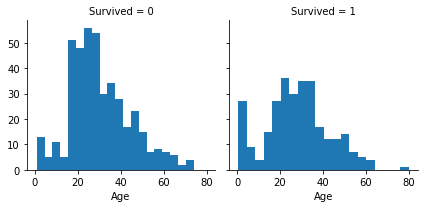

In [12]:
grid = sns.FacetGrid(train_data,col = 'Survived')
grid.map(plt.hist,'Age',bins=20)

**Observation**<br>
Most passengers are between age 15-35 <br>
Infants (Age<=4) has high survival rate <br>
Majority passengers between Age 15-25 did not survive <br>
Oldest passenger of (Age = 80) survived<br>

**Decision**<br>
We should use age feature<br>
Complete Null Values<br>
Make Age Bands groups<br>

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


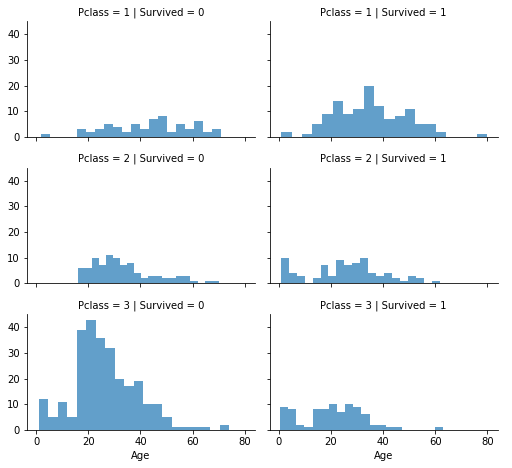

In [13]:
grid = sns.FacetGrid(train_data,col = 'Survived',row = 'Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20,alpha=0.7)
grid.add_legend()

**Observation**: <br>
Most Passengers of Pclass 1 Survived <br>
Most Passengers are from Pclass 3 but did not survive <br>
Infant passengers of Pclass 2 has survived

**Decision**:<br>
Use Pclass in model training

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


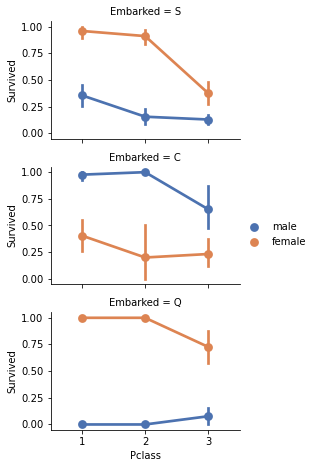

In [14]:
grid = sns.FacetGrid(train_data, row = 'Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observation**: <br>
Females Have higher survival rate compared to male. <br>
Exception in C where male has higher survival rate. This could be correlation between Pclass and Embarked but not direct correlation between Embarked and Survived <br>
Males had better survival rate in Pclass 3 compared to Pclass 2 in C & Q Embarked.<br>

**Decision**: <br>
Use Sex feature. <br>
Complete Embarked feature and use it.

/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


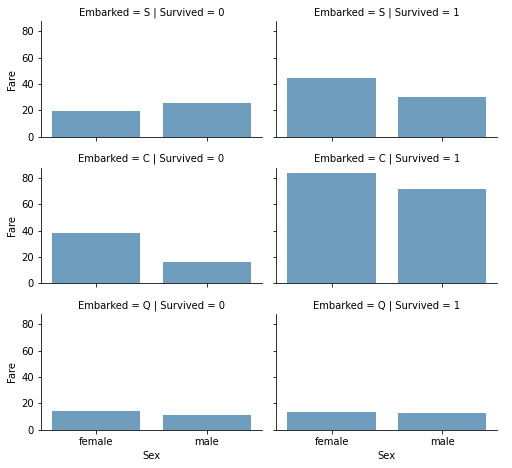

In [15]:
grid = sns.FacetGrid(train_data, col='Survived',row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.7,ci=None)
grid.add_legend()

**Observation**:<br>
Port of Embarkation correlates with Survival rate<br>
Passengers who paid more fair has high survival rate.<br>

**Decision**:<br>
Make Fair bands to convert continous feature to ordinal feature.

### Wrangle Data

#### Dropping features

In [16]:
train_data = train_data.drop(['Ticket','Cabin'],axis=1)
test_data = test_data.drop(['Ticket','Cabin'],axis=1)
combine = [train_data,test_data]

Ticket and Cabin column has been dropped from train and test data

#### Engineering feature

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We will label least used titles as Rare <br>
We will relable misspelled title

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


/Users/vidhanjain/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


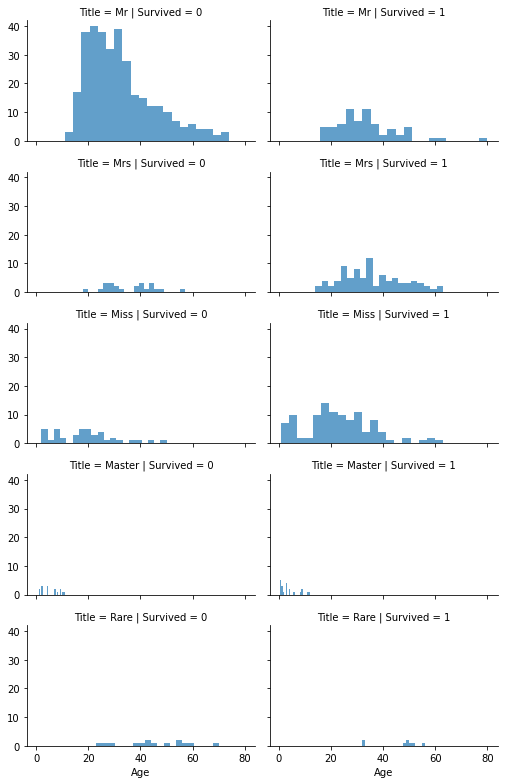

In [19]:
grid = sns.FacetGrid(train_data,col = 'Survived',row = 'Title',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20,alpha=0.7)
grid.add_legend()

**Observations**:<br>
Passengers with 'Mr' title mostly died.<br>
Passengers with 'Mrs' and 'Miss' title mostly survived.<br>
Mean age of passengers have title 'Master' is 5.

**Decision**:<br>
We will keep Title feature since it contribute towards our aim.

In [20]:
title_mapping = {"Mrs": 1, "Miss": 2, "Master": 3, "Rare": 4, "Mr": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


Since we have converted categorical feature to ordinal feature, now we can safely drop Name feature

In [21]:
train_data = train_data.drop(['Name'],axis=1)
test_data = test_data.drop(['Name'],axis=1)
combine = [train_data,test_data]

In [22]:
train_data = train_data.drop(['PassengerId'],axis=1)
test_data = test_data.drop(['PassengerId'],axis=1)
combine = [train_data,test_data]

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1})
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,5
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,5


In [24]:
guess_age = np.zeros((2,3))

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            ages = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age1 = ages.median()
            
            guess_age[i,j] = int( age1/0.5 + 0.5 ) * 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age'] = guess_age[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
    
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


Since we have filled Null space of Age feature, we can now create age band

In [25]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,5,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,5,"(32.0, 48.0]"


In [27]:
train_data = train_data.drop(['AgeBand'],axis=1)
combine = [train_data,test_data]

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,5
1,1,1,0,2,1,0,71.2833,C,1
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,1
4,0,3,1,2,0,0,8.0500,S,5


In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,5,0
1,1,1,0,2,71.2833,C,1,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,1,0
4,0,3,1,2,8.0500,S,5,1


Now we have made IsAlone feature and removed Parch and SibSp from our Dataset.<br>
Next we need to fill Embarked Null values and need to change it to numerical feature.

In [31]:
freq_emb = train_data.Embarked.dropna().mode()[0]
freq_emb

'S'

Most occured Embarked value to be filled in the place of Null values.

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_emb)
    
train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(['Survived'],ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


Now we are left with Fare feature but first we need to fill null values in Fare feature in test set.

In [35]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(),inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Title     418 non-null    int64  
 6   IsAlone   418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


Creating Fare bands

In [36]:
train_data['FareBand']=pd.qcut(train_data["Fare"],4)
train_data[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by = 'Survived',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data,test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,0,0,5,0
1,1,1,0,2,3,1,1,0
2,1,3,0,1,1,0,2,1
3,1,1,0,2,3,0,1,0
4,0,3,1,2,1,0,5,1


In [38]:
train_data[['Pclass','Age','Fare','Embarked','Title']] = train_data[['Pclass','Age','Fare','Embarked','Title']].astype(str)
train_data = pd.get_dummies(train_data, columns = ['Pclass','Age','Fare','Embarked','Title'])
train_data.head()

,Survived,Sex,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,...,Fare_2,Fare_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
test_data[['Pclass','Age','Fare','Embarked','Title']] = test_data[['Pclass','Age','Fare','Embarked','Title']].astype(str)
test_data = pd.get_dummies(test_data, columns = ['Pclass','Age','Fare','Embarked','Title'])
test_data.head()

,Sex,IsAlone,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,Age_67,...,Fare_2,Fare_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [40]:
data_train = train_data.iloc[:700]
data_dev = train_data.iloc[700:]

### Model Making (Logistic Regression)

In [41]:
X_train = data_train.iloc[:,1:].to_numpy()
y_train = data_train[['Survived']].to_numpy()
X_dev = data_dev.iloc[:,1:].to_numpy()
y_dev = data_dev[['Survived']].to_numpy()

In [42]:
m = np.size(X_train,axis=0)
X = np.append(np.ones([m,1]),X_train,axis=1)
X_dev = np.append(np.ones([np.size(X_dev,axis=0),1]),X_dev,axis=1)
n = np.size(X,axis=1)

In [43]:
theta = np.zeros([n,1])

def sigmoid(X,theta):
    z = np.dot(X,theta)
    h = 1/(1+(np.exp(-z)))
    h = h.astype('float128')
    return h

In [44]:
def logliklihood(m,theta,lamda,X,y):
    a = sigmoid(X,theta)
    l = (1/m)*np.sum((y*np.log(a))+((1-y)*np.log(1-a)))
    reg_term = (lamda/(2*m)) * np.sum(np.square(theta[1:n]))
    l = l + reg_term
    return l

In [62]:
alpha = np.array([[0.000001,0.00001,0.0001,0.0002,0.001,0.002,0.003,0.01,0.02,0.03,0.04,1]])
lamda = np.array([[0.000001,0.00001,0.0001,0.0002,0.001,0.002,0.003,0.01,0.02,0.03,0.04,5,6,7,8,10,100]])
theta_alpha = np.zeros([n,np.size(alpha),np.size(lamda)])
liklihood_alpha = np.zeros([np.size(alpha),np.size(lamda)])
for j in range(0,np.size(alpha)):
    for k in range(0,np.size(lamda)):
        a = sigmoid(X,theta_alpha[:,j,k])
        theta_alpha[0,j,k]=theta_alpha[0,j,k]+((alpha[0,j]/m)*np.sum((y_train-a)*X[:,0]))
        for i in range(1,n):
            theta_alpha[i,j,k]=theta_alpha[i,j,k]+((alpha[0,j]/m)*np.sum((y_train-a)*X[:,i]))+((lamda[0,k]/m)*theta_alpha[i,j,k])

In [63]:
for j in range(0,np.size(alpha)):
    for k in range(0,np.size(lamda)):
        liklihood_alpha[j,k]=logliklihood(np.size(X_dev,axis=0),theta_alpha[:,j,k],lamda[0,k],X_dev,y_dev)

In [64]:
liklihood_alpha

array([[  -132.38371684,   -132.38371684,   -132.38371684,
          -132.38371684,   -132.38371684,   -132.38371684,
          -132.38371684,   -132.38371684,   -132.38371684,
          -132.38371684,   -132.38371684,   -132.38371684,
          -132.38371684,   -132.38371684,   -132.38371684,
          -132.38371684,   -132.38371684],
       [  -132.31737024,   -132.31737024,   -132.31737024,
          -132.31737024,   -132.31737024,   -132.31737024,
          -132.31737024,   -132.31737024,   -132.31737024,
          -132.31737024,   -132.31737024,   -132.31737022,
          -132.31737022,   -132.31737021,   -132.31737021,
          -132.3173702 ,   -132.31736979],
       [  -131.67421867,   -131.67421867,   -131.67421867,
          -131.67421867,   -131.67421866,   -131.67421866,
          -131.67421866,   -131.67421866,   -131.67421866,
          -131.67421865,   -131.67421865,   -131.6742164 ,
          -131.67421595,   -131.67421549,   -131.67421504,
          -131.67421413,   -1

In [65]:
r = np.where(liklihood_alpha == np.amax(liklihood_alpha))
r

(array([5]), array([16]))

In [67]:
theta = np.array([theta_alpha[:,5,16]])
theta.T

array([[-0.158     ],
       [-0.10134571],
       [-0.09344571],
       [-0.03814571],
       [-0.03272857],
       [-0.08712571],
       [-0.01670286],
       [-0.08848   ],
       [-0.03746857],
       [-0.01331714],
       [-0.00067714],
       [-0.00022571],
       [-0.00045143],
       [-0.00045143],
       [ 0.        ],
       [-0.00022571],
       [-0.03837143],
       [-0.03792   ],
       [-0.04153143],
       [-0.04017714],
       [-0.11353429],
       [-0.03024571],
       [-0.01422   ],
       [-0.02144286],
       [-0.03498571],
       [-0.00609429],
       [-0.00361143],
       [-0.09186571]])

In [71]:
h_test = sigmoid(X_train,theta.T)

ValueError: shapes (700,27) and (28,1) not aligned: 27 (dim 1) != 28 (dim 0)

In [69]:
h_test

array([[0.4069734 ],
       [0.3373028 ],
       [0.39165315],
       [0.33785801],
       [0.33654641],
       [0.33851475],
       [0.37882464],
       [0.3373028 ],
       [0.36198279],
       [0.37453202],
       [0.38143071],
       [0.3373028 ],
       [0.35880901],
       [0.31610777],
       [0.34475908],
       [0.31601019],
       [0.39353701],
       [0.36375705],
       [0.33715145],
       [0.32713822],
       [0.40224285],
       [0.33654641],
       [0.33932391],
       [0.34475908],
       [0.34715949],
       [0.31610777],
       [0.38800233],
       [0.37410911],
       [0.34808086],
       [0.37284154],
       [0.36198279],
       [0.34972167],
       [0.32788392],
       [0.32798341],
       [0.32798341],
       [0.31532756],
       [0.38752006],
       [0.35647557],
       [0.31601019],
       [0.31601019],
       [0.3373028 ],
       [0.35880901],
       [0.40370905],
       [0.3358412 ],
       [0.31610777],
       [0.38810953],
       [0.35203508],
       [0.363